# 任务一：提取音频特征
本任务的目标是从音频文件中提取特征，绘制特征图，并将其保存为`numpy`数组。我们将使用`librosa`库来处理音频数据。
需要提取的特征包括：
- **MFCC**（梅尔频率倒谱系数）
- **Chroma**（色度特征）
- **Mel**（梅尔频谱）
- **STFT**（短时傅里叶变换）

In [1]:
# TODO import necessary libraries
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# TODO 读取音频文件
# 音频文件路径为 `./data/sample_recording.wav`
# audio_path = 'data/noisy.wav'
# 读取音频文件，转换为16kHz采样率的单声道音频
# audio, sr = librosa.load(audio_path, sr=16000, mono=True)

In [ ]:
# TODO 定义特征提取函数
def extract_features(audio, sr):
    # 提取 MFCC 特征
    
    # 提取 Chroma 特征
    
    # 提取 Mel 频谱特征
    
    # 提取 STFT 特征
    


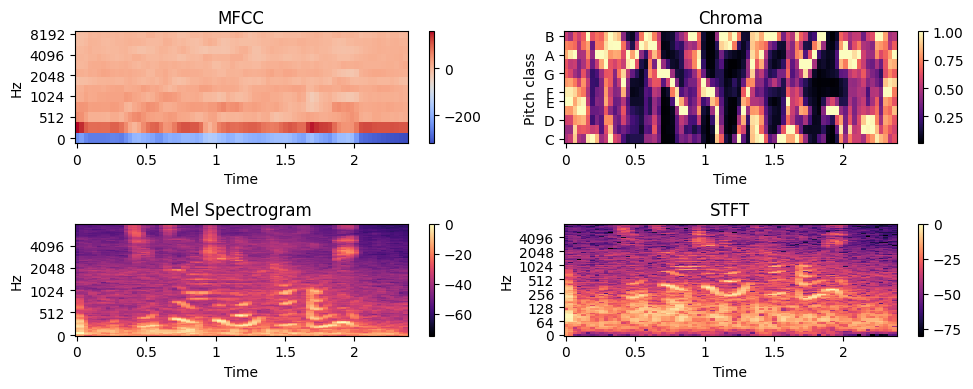

In [ ]:
# TODO: 提取特征并绘制特征图
# 绘制 MFCC 特征图


# 绘制 Chroma 特征图

# 绘制 Mel 谱

# 绘制 STFT 特征图


# 任务二：音频降噪
本任务的目标是对音频文件进行降噪处理。我们将使用`clearvoice`库来实现音频降噪。
https://stable-learn.com/en/clearvoice-studio-tutorial/
- **降噪处理**：对音频文件进行降噪处理，并将处理后的音频保存为新的文件。
- **MOS评分**：对降噪后的音频进行MOS（Mean Opinion Score）评分，评估音频质量。
- **SRMR评分**：计算降噪后音频的SRMR（Speech-to-Reverberation Modulation Energy Ratio）评分，评估音频清晰度。

In [ ]:
from clearvoice import ClearVoice
import os


Running MossFormer2_SE_48K ...


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


In [6]:
import pprint
from speechscore import evaluate_scores
scores = evaluate_scores(test_path='data/enhanced.wav')

pprint.pprint(scores)

{'DNSMOS': {'BAK': 3.761586960594241,
            'OVRL': 2.816647644209436,
            'P808_MOS': 3.569862,
            'SIG': 3.228619218819801},
 'SRMR': 17.265090992657523}


# 任务三：构建和训练语音情感分类模型
本任务的目标是构建和训练一个语音情感分类模型。我们将使用`PyTorch`库来实现模型的构建和训练
- **数据预处理**：对音频数据进行预处理，包括特征提取和数据增强。
- **模型构建**：使用`PyTorch`构建一个简单的卷积神经网络（CNN）模型。
- **模型训练**：使用预处理后的数据训练模型，并保存训练好的模型。
- **模型评估**：使用测试集评估模型的性能，并输出分类报告和混淆矩阵。

## 数据预处理
### 数据集结构
```plain
dataset
├── angry  [200 entries exceeds filelimit, not opening dir]
├── fear  [200 entries exceeds filelimit, not opening dir]
├── happy  [200 entries exceeds filelimit, not opening dir]
├── neutral  [200 entries exceeds filelimit, not opening dir]
├── sad  [200 entries exceeds filelimit, not opening dir]
└── surprise  [200 entries exceeds filelimit, not opening dir]
```
- 使用`librosa`库来读取音频文件，并提取特征。
    - Mel Spectrogram
    - Pitch/F0
- 使用`pytorch` 的 `dataset`和`dataloader`来加载数据。


In [ ]:
# TODO: 定义 EmotionFeatureDataset 类
# 该类用于加载情感识别数据集，并提取音频特征
# 该类继承自 PyTorch 的 Dataset 类，支持数据加载和特征提取
# train - val split
# 音频特征包括 Mel 频谱和基频（F0）
# 特征缓存到指定目录，避免重复计算 npy 文件
# 特征长度固定为 max_len，短的用零填充，长的截断
import os
import librosa
import numpy as np
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

EMOTION_LABELS = ["angry", "fear", "happy", "neutral", "sad", "surprise"]
label_map = {label: idx for idx, label in enumerate(EMOTION_LABELS)}

class EmotionFeatureDataset(Dataset):
    def __init__(self, root_dir, sr=16000, n_mels=128, max_len=300,
                 split='train', train_ratio=0.8, random_state=42,
                 cache_dir='feature_cache'):
        self.root_dir = root_dir
        self.sr = sr
        self.n_mels = n_mels
        self.max_len = max_len
        self.split = split
        self.cache_dir = cache_dir

        os.makedirs(cache_dir, exist_ok=True)

        


## 模型构建
使用`PyTorch`构建一个简单的卷积神经网络（CNN）模型。
- 输入层：接收音频特征数据。
- 卷积层：提取音频特征的局部模式。
- 池化层：降低特征维度，减少计算量。
- 全连接层：将卷积层的输出映射到情感类别。

In [ ]:
# 将 (129, T) 视为一个“单通道图像”
# 使用卷积 → 池化 → 全连接 → softmax 分类
import torch.nn as nn
import torch.nn.functional as F

class EmotionCNN(nn.Module):
    def __init__(self, n_input=129, n_classes=6):
        super(EmotionCNN, self).__init__()


    def forward(self, x):
        return x


## 训练模型

In [25]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from tqdm import tqdm
from torch.profiler import profile, record_function, ProfilerActivity

# -------------------- 配置项 --------------------
MODEL_TYPE = 'cnn'
BATCH_SIZE = 16
N_EPOCHS = 40
LEARNING_RATE = 1e-3
MAX_LEN = 300
MODEL_PATH = f'emotion_{MODEL_TYPE}.pt'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# -------------------- 数据加载 --------------------
train_dataset = EmotionFeatureDataset('dataset', split='train', max_len=MAX_LEN)
val_dataset = EmotionFeatureDataset('dataset', split='val', max_len=MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

model = EmotionCNN(n_input=129)

model.to(DEVICE)

# -------------------- 训练准备 --------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# -------------------- 训练函数 --------------------
def train():
    for epoch in range(N_EPOCHS):
        model.train()
        running_loss = 0.0

        for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{N_EPOCHS}"):
            X, y = X.to(DEVICE), y.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f"🧪 Epoch {epoch+1} | Loss: {avg_loss:.4f}")

        evaluate()

    # 保存模型
    torch.save(model.state_dict(), MODEL_PATH)
    print(f"✅ 模型已保存: {MODEL_PATH}")

def train_one_epoch(epoch, model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0

    for X, y in loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        with record_function("forward_and_backward"):
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

        running_loss += loss.item()

    print(f"✅ Epoch {epoch+1}: Loss = {running_loss / len(loader):.4f}")

def train_with_profiler(model, train_loader, device, epochs=1):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    # 使用 torch.profiler
    with profile(
        activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],
        schedule=torch.profiler.schedule(wait=0, warmup=1, active=2),
        on_trace_ready=torch.profiler.tensorboard_trace_handler('./profiler_log'),
        record_shapes=True,
        profile_memory=True,
        with_stack=True
    ) as prof:
        for epoch in range(epochs):
            for X, y in train_loader:
                X, y = X.to(device), y.to(device)
                with record_function("model_train_step"):
                    outputs = model(X)
                    loss = criterion(outputs, y)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                prof.step()

    # 打印关键耗时操作
    print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=20))

# -------------------- 评估函数 --------------------
def evaluate():
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for X, y in val_loader:
            X = X.to(DEVICE)
            outputs = model(X)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            y_pred.extend(preds)
            y_true.extend(y.numpy())

    print("🎯 验证集分类报告:")
    print(classification_report(y_true, y_pred, target_names=EMOTION_LABELS))


# -------------------- 启动训练 --------------------
print(f"🚀 使用模型: {MODEL_TYPE.upper()} 开始训练...")
train()


🚀 使用模型: CNN 开始训练...


Epoch 1/40:   0%|          | 0/57 [00:00<?, ?it/s]

Epoch 1/40: 100%|██████████| 57/57 [00:01<00:00, 49.48it/s]


🧪 Epoch 1 | Loss: 2.4938
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.56      0.24      0.33        38
        fear       1.00      0.03      0.05        38
       happy       0.13      0.53      0.21        38
     neutral       0.26      0.34      0.30        38
         sad       0.00      0.00      0.00        38
    surprise       0.29      0.05      0.09        38

    accuracy                           0.20       228
   macro avg       0.37      0.20      0.16       228
weighted avg       0.37      0.20      0.16       228



Epoch 2/40: 100%|██████████| 57/57 [00:01<00:00, 50.75it/s]


🧪 Epoch 2 | Loss: 1.6726
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.35      0.61      0.45        38
        fear       0.00      0.00      0.00        38
       happy       0.12      0.08      0.10        38
     neutral       0.38      0.29      0.33        38
         sad       0.37      0.50      0.42        38
    surprise       0.36      0.53      0.43        38

    accuracy                           0.33       228
   macro avg       0.26      0.33      0.29       228
weighted avg       0.26      0.33      0.29       228



Epoch 3/40: 100%|██████████| 57/57 [00:01<00:00, 50.74it/s]


🧪 Epoch 3 | Loss: 1.5490
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.41      0.66      0.51        38
        fear       0.70      0.18      0.29        38
       happy       0.24      0.42      0.30        38
     neutral       0.53      0.45      0.49        38
         sad       0.54      0.34      0.42        38
    surprise       0.47      0.42      0.44        38

    accuracy                           0.41       228
   macro avg       0.48      0.41      0.41       228
weighted avg       0.48      0.41      0.41       228



Epoch 4/40: 100%|██████████| 57/57 [00:01<00:00, 51.20it/s]


🧪 Epoch 4 | Loss: 1.3718
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.76      0.50      0.60        38
        fear       0.67      0.11      0.18        38
       happy       0.20      0.05      0.08        38
     neutral       0.45      0.39      0.42        38
         sad       0.36      0.82      0.50        38
    surprise       0.47      0.84      0.60        38

    accuracy                           0.45       228
   macro avg       0.49      0.45      0.40       228
weighted avg       0.49      0.45      0.40       228



Epoch 5/40: 100%|██████████| 57/57 [00:01<00:00, 51.17it/s]


🧪 Epoch 5 | Loss: 1.2626
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.58      0.74      0.65        38
        fear       0.60      0.82      0.69        38
       happy       0.39      0.68      0.50        38
     neutral       0.71      0.45      0.55        38
         sad       0.82      0.37      0.51        38
    surprise       0.71      0.39      0.51        38

    accuracy                           0.57       228
   macro avg       0.64      0.57      0.57       228
weighted avg       0.64      0.57      0.57       228



Epoch 6/40: 100%|██████████| 57/57 [00:01<00:00, 51.24it/s]


🧪 Epoch 6 | Loss: 1.0993
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.84      0.68      0.75        38
        fear       0.74      0.68      0.71        38
       happy       0.46      0.61      0.52        38
     neutral       0.85      0.58      0.69        38
         sad       0.54      0.74      0.62        38
    surprise       0.76      0.68      0.72        38

    accuracy                           0.66       228
   macro avg       0.70      0.66      0.67       228
weighted avg       0.70      0.66      0.67       228



Epoch 7/40: 100%|██████████| 57/57 [00:01<00:00, 50.81it/s]


🧪 Epoch 7 | Loss: 0.9731
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.57      0.82      0.67        38
        fear       0.69      0.76      0.72        38
       happy       0.62      0.42      0.50        38
     neutral       0.68      0.84      0.75        38
         sad       0.60      0.74      0.66        38
    surprise       0.83      0.26      0.40        38

    accuracy                           0.64       228
   macro avg       0.66      0.64      0.62       228
weighted avg       0.66      0.64      0.62       228



Epoch 8/40: 100%|██████████| 57/57 [00:01<00:00, 50.91it/s]


🧪 Epoch 8 | Loss: 0.8296
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.95      0.47      0.63        38
        fear       0.56      0.92      0.69        38
       happy       0.68      0.50      0.58        38
     neutral       0.70      0.74      0.72        38
         sad       0.89      0.42      0.57        38
    surprise       0.58      0.92      0.71        38

    accuracy                           0.66       228
   macro avg       0.73      0.66      0.65       228
weighted avg       0.73      0.66      0.65       228



Epoch 9/40: 100%|██████████| 57/57 [00:01<00:00, 51.02it/s]


🧪 Epoch 9 | Loss: 0.7196
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.67      0.82      0.74        38
        fear       0.62      0.89      0.73        38
       happy       0.67      0.53      0.59        38
     neutral       0.85      0.74      0.79        38
         sad       0.75      0.55      0.64        38
    surprise       0.81      0.76      0.78        38

    accuracy                           0.71       228
   macro avg       0.73      0.71      0.71       228
weighted avg       0.73      0.71      0.71       228



Epoch 10/40: 100%|██████████| 57/57 [00:01<00:00, 50.88it/s]


🧪 Epoch 10 | Loss: 0.6138
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.91      0.76      0.83        38
        fear       0.80      0.84      0.82        38
       happy       0.54      0.79      0.64        38
     neutral       0.91      0.53      0.67        38
         sad       0.84      0.68      0.75        38
    surprise       0.74      0.92      0.82        38

    accuracy                           0.75       228
   macro avg       0.79      0.75      0.76       228
weighted avg       0.79      0.75      0.76       228



Epoch 11/40: 100%|██████████| 57/57 [00:01<00:00, 50.96it/s]


🧪 Epoch 11 | Loss: 0.5590
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.83      0.63      0.72        38
        fear       0.63      0.87      0.73        38
       happy       0.57      0.66      0.61        38
     neutral       0.96      0.61      0.74        38
         sad       0.85      0.45      0.59        38
    surprise       0.61      0.95      0.74        38

    accuracy                           0.69       228
   macro avg       0.74      0.69      0.69       228
weighted avg       0.74      0.69      0.69       228



Epoch 12/40: 100%|██████████| 57/57 [00:01<00:00, 50.91it/s]


🧪 Epoch 12 | Loss: 0.4759
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.94      0.45      0.61        38
        fear       0.73      0.84      0.78        38
       happy       0.51      0.58      0.54        38
     neutral       0.91      0.79      0.85        38
         sad       0.72      0.74      0.73        38
    surprise       0.65      0.87      0.74        38

    accuracy                           0.71       228
   macro avg       0.74      0.71      0.71       228
weighted avg       0.74      0.71      0.71       228



Epoch 13/40: 100%|██████████| 57/57 [00:01<00:00, 50.72it/s]


🧪 Epoch 13 | Loss: 0.4223
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.88      0.76      0.82        38
        fear       0.44      0.92      0.59        38
       happy       0.66      0.61      0.63        38
     neutral       0.87      0.68      0.76        38
         sad       0.68      0.50      0.58        38
    surprise       0.86      0.50      0.63        38

    accuracy                           0.66       228
   macro avg       0.73      0.66      0.67       228
weighted avg       0.73      0.66      0.67       228



Epoch 14/40: 100%|██████████| 57/57 [00:01<00:00, 51.16it/s]


🧪 Epoch 14 | Loss: 0.4163
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.73      0.84      0.78        38
        fear       0.89      0.42      0.57        38
       happy       0.61      0.37      0.46        38
     neutral       0.96      0.63      0.76        38
         sad       0.49      0.92      0.64        38
    surprise       0.74      0.89      0.81        38

    accuracy                           0.68       228
   macro avg       0.74      0.68      0.67       228
weighted avg       0.74      0.68      0.67       228



Epoch 15/40: 100%|██████████| 57/57 [00:01<00:00, 51.16it/s]


🧪 Epoch 15 | Loss: 0.3721
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.78      0.76      0.77        38
        fear       0.52      0.87      0.65        38
       happy       0.53      0.82      0.65        38
     neutral       0.79      0.82      0.81        38
         sad       0.86      0.47      0.61        38
    surprise       0.80      0.21      0.33        38

    accuracy                           0.66       228
   macro avg       0.72      0.66      0.64       228
weighted avg       0.72      0.66      0.64       228



Epoch 16/40: 100%|██████████| 57/57 [00:01<00:00, 50.21it/s]


🧪 Epoch 16 | Loss: 0.3220
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.65      0.79      0.71        38
        fear       0.76      0.89      0.82        38
       happy       0.65      0.63      0.64        38
     neutral       0.89      0.82      0.85        38
         sad       0.79      0.68      0.73        38
    surprise       0.81      0.68      0.74        38

    accuracy                           0.75       228
   macro avg       0.76      0.75      0.75       228
weighted avg       0.76      0.75      0.75       228



Epoch 17/40: 100%|██████████| 57/57 [00:01<00:00, 50.90it/s]


🧪 Epoch 17 | Loss: 0.1738
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.75      0.79      0.77        38
        fear       0.71      0.89      0.79        38
       happy       0.72      0.61      0.66        38
     neutral       0.76      0.92      0.83        38
         sad       0.83      0.76      0.79        38
    surprise       0.81      0.58      0.68        38

    accuracy                           0.76       228
   macro avg       0.76      0.76      0.75       228
weighted avg       0.76      0.76      0.75       228



Epoch 18/40: 100%|██████████| 57/57 [00:01<00:00, 51.09it/s]


🧪 Epoch 18 | Loss: 0.1361
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.88      0.74      0.80        38
        fear       0.79      0.82      0.81        38
       happy       0.73      0.71      0.72        38
     neutral       0.76      0.89      0.82        38
         sad       0.92      0.63      0.75        38
    surprise       0.69      0.89      0.78        38

    accuracy                           0.78       228
   macro avg       0.80      0.78      0.78       228
weighted avg       0.80      0.78      0.78       228



Epoch 19/40: 100%|██████████| 57/57 [00:01<00:00, 51.16it/s]


🧪 Epoch 19 | Loss: 0.0801
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.81      0.79      0.80        38
        fear       0.61      0.87      0.72        38
       happy       0.75      0.55      0.64        38
     neutral       0.86      0.79      0.82        38
         sad       0.83      0.50      0.62        38
    surprise       0.67      0.89      0.76        38

    accuracy                           0.73       228
   macro avg       0.75      0.73      0.73       228
weighted avg       0.75      0.73      0.73       228



Epoch 20/40: 100%|██████████| 57/57 [00:01<00:00, 51.23it/s]


🧪 Epoch 20 | Loss: 0.0728
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.93      0.74      0.82        38
        fear       0.53      0.92      0.67        38
       happy       0.69      0.66      0.68        38
     neutral       0.90      0.74      0.81        38
         sad       0.75      0.63      0.69        38
    surprise       0.79      0.68      0.73        38

    accuracy                           0.73       228
   macro avg       0.77      0.73      0.73       228
weighted avg       0.77      0.73      0.73       228



Epoch 21/40: 100%|██████████| 57/57 [00:01<00:00, 51.14it/s]


🧪 Epoch 21 | Loss: 0.0476
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.74      0.84      0.79        38
        fear       0.85      0.76      0.81        38
       happy       0.75      0.71      0.73        38
     neutral       0.83      0.92      0.88        38
         sad       0.79      0.79      0.79        38
    surprise       0.83      0.76      0.79        38

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228



Epoch 22/40: 100%|██████████| 57/57 [00:01<00:00, 51.15it/s]


🧪 Epoch 22 | Loss: 0.0382
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.85      0.76      0.81        38
        fear       0.72      0.87      0.79        38
       happy       0.65      0.68      0.67        38
     neutral       0.80      0.87      0.84        38
         sad       0.83      0.63      0.72        38
    surprise       0.84      0.84      0.84        38

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.78      0.78      0.78       228



Epoch 23/40: 100%|██████████| 57/57 [00:01<00:00, 51.75it/s]


🧪 Epoch 23 | Loss: 0.0311
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.82      0.82      0.82        38
        fear       0.80      0.87      0.84        38
       happy       0.63      0.76      0.69        38
     neutral       0.86      0.84      0.85        38
         sad       0.89      0.63      0.74        38
    surprise       0.82      0.84      0.83        38

    accuracy                           0.79       228
   macro avg       0.80      0.79      0.79       228
weighted avg       0.80      0.79      0.79       228



Epoch 24/40: 100%|██████████| 57/57 [00:01<00:00, 52.21it/s]


🧪 Epoch 24 | Loss: 0.0218
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.86      0.79      0.82        38
        fear       0.66      0.87      0.75        38
       happy       0.66      0.71      0.68        38
     neutral       0.86      0.84      0.85        38
         sad       0.79      0.61      0.69        38
    surprise       0.83      0.79      0.81        38

    accuracy                           0.77       228
   macro avg       0.78      0.77      0.77       228
weighted avg       0.78      0.77      0.77       228



Epoch 25/40: 100%|██████████| 57/57 [00:01<00:00, 51.37it/s]


🧪 Epoch 25 | Loss: 0.0154
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.79      0.82      0.81        38
        fear       0.78      0.84      0.81        38
       happy       0.69      0.66      0.68        38
     neutral       0.80      0.84      0.82        38
         sad       0.81      0.76      0.78        38
    surprise       0.81      0.76      0.78        38

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.78      0.78      0.78       228



Epoch 26/40: 100%|██████████| 57/57 [00:01<00:00, 50.98it/s]


🧪 Epoch 26 | Loss: 0.0123
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.86      0.79      0.82        38
        fear       0.77      0.87      0.81        38
       happy       0.67      0.68      0.68        38
     neutral       0.82      0.84      0.83        38
         sad       0.82      0.71      0.76        38
    surprise       0.82      0.84      0.83        38

    accuracy                           0.79       228
   macro avg       0.79      0.79      0.79       228
weighted avg       0.79      0.79      0.79       228



Epoch 27/40: 100%|██████████| 57/57 [00:01<00:00, 49.51it/s]


🧪 Epoch 27 | Loss: 0.0105
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.85      0.76      0.81        38
        fear       0.70      0.87      0.78        38
       happy       0.68      0.66      0.67        38
     neutral       0.89      0.84      0.86        38
         sad       0.76      0.68      0.72        38
    surprise       0.78      0.82      0.79        38

    accuracy                           0.77       228
   macro avg       0.78      0.77      0.77       228
weighted avg       0.78      0.77      0.77       228



Epoch 28/40: 100%|██████████| 57/57 [00:01<00:00, 50.13it/s]


🧪 Epoch 28 | Loss: 0.0087
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.79      0.79      0.79        38
        fear       0.82      0.84      0.83        38
       happy       0.65      0.74      0.69        38
     neutral       0.84      0.84      0.84        38
         sad       0.86      0.79      0.82        38
    surprise       0.83      0.76      0.79        38

    accuracy                           0.79       228
   macro avg       0.80      0.79      0.80       228
weighted avg       0.80      0.79      0.80       228



Epoch 29/40: 100%|██████████| 57/57 [00:01<00:00, 50.89it/s]


🧪 Epoch 29 | Loss: 0.0107
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.83      0.79      0.81        38
        fear       0.78      0.82      0.79        38
       happy       0.68      0.74      0.71        38
     neutral       0.86      0.84      0.85        38
         sad       0.81      0.76      0.78        38
    surprise       0.82      0.82      0.82        38

    accuracy                           0.79       228
   macro avg       0.80      0.79      0.79       228
weighted avg       0.80      0.79      0.79       228



Epoch 30/40: 100%|██████████| 57/57 [00:01<00:00, 50.56it/s]


🧪 Epoch 30 | Loss: 0.0075
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.83      0.79      0.81        38
        fear       0.86      0.79      0.82        38
       happy       0.67      0.68      0.68        38
     neutral       0.82      0.84      0.83        38
         sad       0.81      0.79      0.80        38
    surprise       0.79      0.87      0.82        38

    accuracy                           0.79       228
   macro avg       0.80      0.79      0.79       228
weighted avg       0.80      0.79      0.79       228



Epoch 31/40: 100%|██████████| 57/57 [00:01<00:00, 50.96it/s]


🧪 Epoch 31 | Loss: 0.0060
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.86      0.79      0.82        38
        fear       0.86      0.82      0.84        38
       happy       0.66      0.71      0.68        38
     neutral       0.86      0.84      0.85        38
         sad       0.79      0.79      0.79        38
    surprise       0.80      0.87      0.84        38

    accuracy                           0.80       228
   macro avg       0.81      0.80      0.80       228
weighted avg       0.81      0.80      0.80       228



Epoch 32/40: 100%|██████████| 57/57 [00:01<00:00, 51.05it/s]


🧪 Epoch 32 | Loss: 0.0055
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.86      0.79      0.82        38
        fear       0.70      0.84      0.76        38
       happy       0.70      0.74      0.72        38
     neutral       0.82      0.84      0.83        38
         sad       0.80      0.63      0.71        38
    surprise       0.82      0.82      0.82        38

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.78      0.78      0.78       228



Epoch 33/40: 100%|██████████| 57/57 [00:01<00:00, 50.89it/s]


🧪 Epoch 33 | Loss: 0.0059
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.81      0.79      0.80        38
        fear       0.74      0.84      0.79        38
       happy       0.67      0.74      0.70        38
     neutral       0.86      0.84      0.85        38
         sad       0.82      0.71      0.76        38
    surprise       0.83      0.79      0.81        38

    accuracy                           0.79       228
   macro avg       0.79      0.79      0.79       228
weighted avg       0.79      0.79      0.79       228



Epoch 34/40: 100%|██████████| 57/57 [00:01<00:00, 50.81it/s]


🧪 Epoch 34 | Loss: 0.0049
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.85      0.76      0.81        38
        fear       0.86      0.82      0.84        38
       happy       0.66      0.71      0.68        38
     neutral       0.84      0.84      0.84        38
         sad       0.81      0.79      0.80        38
    surprise       0.79      0.87      0.82        38

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228



Epoch 35/40: 100%|██████████| 57/57 [00:01<00:00, 51.30it/s]


🧪 Epoch 35 | Loss: 0.0043
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.83      0.76      0.79        38
        fear       0.81      0.79      0.80        38
       happy       0.68      0.71      0.69        38
     neutral       0.86      0.84      0.85        38
         sad       0.77      0.79      0.78        38
    surprise       0.80      0.84      0.82        38

    accuracy                           0.79       228
   macro avg       0.79      0.79      0.79       228
weighted avg       0.79      0.79      0.79       228



Epoch 36/40: 100%|██████████| 57/57 [00:01<00:00, 51.28it/s]


🧪 Epoch 36 | Loss: 0.0037
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.85      0.76      0.81        38
        fear       0.73      0.84      0.78        38
       happy       0.66      0.71      0.68        38
     neutral       0.82      0.84      0.83        38
         sad       0.80      0.63      0.71        38
    surprise       0.80      0.84      0.82        38

    accuracy                           0.77       228
   macro avg       0.78      0.77      0.77       228
weighted avg       0.78      0.77      0.77       228



Epoch 37/40: 100%|██████████| 57/57 [00:01<00:00, 50.76it/s]


🧪 Epoch 37 | Loss: 0.0036
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.85      0.76      0.81        38
        fear       0.73      0.84      0.78        38
       happy       0.68      0.66      0.67        38
     neutral       0.82      0.84      0.83        38
         sad       0.76      0.68      0.72        38
    surprise       0.78      0.82      0.79        38

    accuracy                           0.77       228
   macro avg       0.77      0.77      0.77       228
weighted avg       0.77      0.77      0.77       228



Epoch 38/40: 100%|██████████| 57/57 [00:01<00:00, 50.91it/s]


🧪 Epoch 38 | Loss: 0.0032
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.84      0.82      0.83        38
        fear       0.82      0.82      0.82        38
       happy       0.71      0.63      0.67        38
     neutral       0.82      0.84      0.83        38
         sad       0.78      0.82      0.79        38
    surprise       0.80      0.84      0.82        38

    accuracy                           0.79       228
   macro avg       0.79      0.79      0.79       228
weighted avg       0.79      0.79      0.79       228



Epoch 39/40: 100%|██████████| 57/57 [00:01<00:00, 50.78it/s]


🧪 Epoch 39 | Loss: 0.0031
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.90      0.74      0.81        38
        fear       0.78      0.84      0.81        38
       happy       0.65      0.68      0.67        38
     neutral       0.86      0.84      0.85        38
         sad       0.78      0.74      0.76        38
    surprise       0.74      0.84      0.79        38

    accuracy                           0.78       228
   macro avg       0.79      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228



Epoch 40/40: 100%|██████████| 57/57 [00:01<00:00, 50.87it/s]


🧪 Epoch 40 | Loss: 0.0031
🎯 验证集分类报告:
              precision    recall  f1-score   support

       angry       0.83      0.79      0.81        38
        fear       0.83      0.79      0.81        38
       happy       0.69      0.71      0.70        38
     neutral       0.86      0.84      0.85        38
         sad       0.79      0.79      0.79        38
    surprise       0.79      0.87      0.82        38

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228

✅ 模型已保存: emotion_cnn.pt


## 模型推理
使用训练好的模型来验证

In [19]:
def extract_features_for_inference(filepath, sr=16000, n_mels=128, max_len=300):
    y, _ = librosa.load(filepath, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel)

    f0, _, _ = librosa.pyin(y, fmin=70, fmax=400, sr=sr)
    f0 = np.nan_to_num(f0, nan=0.0)

    T = mel_db.shape[1]
    if len(f0) != T:
        f0 = np.interp(np.linspace(0, len(f0), T), np.arange(len(f0)), f0)
    f0 = f0[np.newaxis, :]

    features = np.vstack([mel_db, f0])  # shape: (129, T)

    # 补齐 / 裁剪
    if features.shape[1] < max_len:
        pad = np.zeros((129, max_len - features.shape[1]), dtype=np.float32)
        features = np.concatenate((features, pad), axis=1)
    elif features.shape[1] > max_len:
        features = features[:, :max_len]

    # 转为 Tensor (1, 129, T)
    return torch.tensor(features, dtype=torch.float32).unsqueeze(0)

def load_model(model_type: str, model_path: str, device, max_len=300):
    model = EmotionCNN(n_input=129)
    
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

def predict_emotion(filepath, model_type='cnn', model_path='emotion_cnn.pt', max_len=300):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = load_model(model_type, model_path, device, max_len)
    features = extract_features_for_inference(filepath, max_len=max_len).to(device)

    with torch.no_grad():
        logits = model(features)
        probs = torch.softmax(logits, dim=1)
        pred_idx = torch.argmax(probs, dim=1).item()
        emotion = EMOTION_LABELS[pred_idx]

    return emotion, probs.squeeze().cpu().numpy()


In [41]:
# 测试模型推理 `predict_emotion`，使用`./data/task-3-test-audio`中的所有的 wav。并将结果保存为 filename(without wav extension):emotion 字典。
# 将结果发送到 POST http://localhost:8060/grade_emotion/ 接口进行评分。
import os
import requests

# 遍历所有 wav 文件 in directory `data/task-3-test-audio`，保存60个结果到一个完整的字典中
# HTTP POST body 的形式为 
# class EmotionRequest(BaseModel):
#     answer: dict[str, str]

emotion_dict: dict[str, str] = {}
for filename in os.listdir("data/task-3-test-audio/"):
    if filename.endswith(".wav"):
        wav_path = os.path.join("data/task-3-test-audio/", filename)
        emotion, prob = predict_emotion(
            filepath=wav_path,
            model_type='cnn',
            model_path='emotion_cnn.pt'
        )
        emotion_dict[os.path.splitext(filename)[0]] = emotion

# 发送 POST 请求到评分接口
response = requests.post(
    "http://localhost:8060/grade_emotion/",
    json={"answer": emotion_dict}
)
print(f"Response: {response.json()}")


Response: {'score': 42, 'total': 60, 'percentage': 70.0}


# Task 4 & 5: 语音合成与语音识别
本人物的目标是同时使用讯飞的语音合成（TTS）和语音识别（ASR）技术，演示如何将文本转换为语音，并将语音转换为文本。
## 文档地址
- [讯飞语音合成文档](https://www.xfyun.cn/doc/spark/super%20smart-tts.html)
- [讯飞语音识别文档](https://www.xfyun.cn/doc/spark/spark_zh_iat.html)

In [27]:
# 构建API的认证URL
import hmac
import hashlib
import base64
from urllib.parse import urlparse, urlencode
from datetime import datetime, timezone


def hmac_with_sha_to_base64(algorithm: str, data: str, key: str) -> str:
    """
    使用HMAC-SHA256算法对数据进行签名并返回base64编码的结果
    
    Args:
        algorithm: 算法名称（固定为"hmac-sha256"）
        data: 要签名的数据
        key: 签名密钥（API Secret）
    
    Returns:
        base64编码的签名结果
    """
    if algorithm != "hmac-sha256":
        raise ValueError("Only hmac-sha256 algorithm is supported")
    
    # 使用HMAC-SHA256进行签名
    signature = hmac.new(
        key.encode('utf-8'),
        data.encode('utf-8'),
        hashlib.sha256
    ).digest()
    
    # 返回base64编码的结果
    return base64.b64encode(signature).decode('utf-8')


def assemble_auth_url(host_url: str, api_key: str, api_secret: str) -> str:
    """
    构建讯飞API的认证URL
    
    Args:
        host_url: WebSocket API地址，如 "wss://iat-api.xfyun.cn/v2/iat"
        api_key: API密钥
        api_secret: API密钥对应的Secret
    
    Returns:
        包含认证参数的完整URL
    """
    # 解析URL
    parsed_url = urlparse(host_url)
    
    # 生成RFC1123格式的UTC时间戳
    # 注意：这里使用UTC时间，格式必须是RFC1123
    date = datetime.now(timezone.utc).strftime('%a, %d %b %Y %H:%M:%S GMT')
    
    # 构建参与签名的字符串
    # 格式：host: {host}\ndate: {date}\n{request_line}
    sign_string_parts = [
        f"host: {parsed_url.hostname}",
        f"date: {date}",
        f"GET {parsed_url.path} HTTP/1.1"
    ]
    
    # 拼接签名字符串（使用换行符连接）
    sign_string = "\n".join(sign_string_parts)
    
    # 使用HMAC-SHA256对签名字符串进行签名
    signature = hmac_with_sha_to_base64("hmac-sha256", sign_string, api_secret)
    
    # 构建authorization原始字符串
    auth_string = (
        f'api_key="{api_key}", '
        f'algorithm="hmac-sha256", '
        f'headers="host date request-line", '
        f'signature="{signature}"'
    )
    
    # 对authorization字符串进行base64编码
    authorization = base64.b64encode(auth_string.encode('utf-8')).decode('utf-8')
    
    # 构建URL参数
    url_params = {
        'host': parsed_url.hostname,
        'date': date,
        'authorization': authorization
    }
    
    # 拼接最终的URL
    call_url = f"{host_url}?{urlencode(url_params)}"
    
    return call_url

In [28]:
# 读取环境变量
import os
from dotenv import load_dotenv
load_dotenv()  # 加载 .env 文件中的环境变量

True

In [30]:
# 语音识别
import asyncio
import websockets
import json
import base64
import wave
import time

class iFlyTekASR:
    def __init__(self, app_id: str, api_key: str, api_secret: str):
        """
        初始化iFlytek ASR客户端 (优化版)
        
        Args:
            app_id: 应用ID
            api_key: API密钥
            api_secret: API密钥对应的Secret
        """
        self.app_id = app_id
        self.api_key = api_key
        self.api_secret = api_secret
        
        # 新版API地址
        self.host_url = "wss://iat.xf-yun.com/v1"
        
        # 优化的音频配置
        self.audio_config = {
            "encoding": "raw",  # PCM格式
            "sample_rate": 16000,  # 16kHz采样率
            "channels": 1,  # 单声道
            "bit_depth": 16,  # 16位深度
        }
        
        # 识别结果
        self.result_text = ""
        self.final_results = {}  # 存储最终结果
        self.partial_results = {}  # 存储部分结果
        
    def get_auth_url(self) -> str:
        """生成认证URL"""
        return assemble_auth_url(self.host_url, self.api_key, self.api_secret)
    
    def create_first_frame(self, seq: int = 1) -> str:
        """创建第一帧数据包"""
        frame = {
            "header": {
                "app_id": self.app_id,
                "res_id": "hot_words",
                "status": 0  # 首帧
            },
            "parameter": {
                "iat": {
                    "domain": "slm",  # 大模型领域
                    "language": "zh_cn",  # 中文
                    "accent": "mandarin",  # 普通话
                    "eos": 6000,  # 静音6秒停止
                    "vinfo": 1,  # 句子级别帧对齐
                    "dwa": "wpgs",  # 流式识别PGS，返回速度更快
                    "result": {
                        "encoding": "utf8",
                        "compress": "raw",
                        "format": "json"
                    }
                }
            },
            "payload": {
                "audio": {
                    "encoding": self.audio_config["encoding"],
                    "sample_rate": self.audio_config["sample_rate"],
                    "channels": self.audio_config["channels"],
                    "bit_depth": self.audio_config["bit_depth"],
                    "seq": seq,
                    "status": 0,  # 开始
                    "audio": ""  # 第一帧不包含音频数据
                }
            }
        }
        return json.dumps(frame, ensure_ascii=False)
    
    def create_audio_frame(self, audio_data: bytes, seq: int, status: int) -> str:
        """创建音频数据帧"""
        # 将音频数据编码为base64
        audio_base64 = base64.b64encode(audio_data).decode('utf-8')
        
        if status == 1:  # 中间帧
            frame = {
                "header": {
                    "app_id": self.app_id,
                    "res_id": "hot_words",
                    "status": 1  # 中间帧
                },
                "payload": {
                    "audio": {
                        "encoding": self.audio_config["encoding"],
                        "sample_rate": self.audio_config["sample_rate"],
                        "channels": self.audio_config["channels"],
                        "bit_depth": self.audio_config["bit_depth"],
                        "seq": seq,
                        "status": 1,  # 继续
                        "audio": audio_base64
                    }
                }
            }
        else:  # 最后一帧
            frame = {
                "header": {
                    "app_id": self.app_id,
                    "res_id": "hot_words",
                    "status": 2  # 最后一帧
                },
                "payload": {
                    "audio": {
                        "encoding": self.audio_config["encoding"],
                        "sample_rate": self.audio_config["sample_rate"],
                        "channels": self.audio_config["channels"],
                        "bit_depth": self.audio_config["bit_depth"],
                        "seq": seq,
                        "status": 2,  # 结束
                        "audio": ""  # 最后一帧不包含音频数据
                    }
                }
            }
        
        return json.dumps(frame, ensure_ascii=False)
    
    def read_wav_file(self, file_path: str) -> tuple:
        """读取WAV文件并转换为16kHz单声道PCM"""
        with wave.open(file_path, 'rb') as wav_file:
            # 获取音频参数
            sample_rate = wav_file.getframerate()
            channels = wav_file.getnchannels()
            sample_width = wav_file.getsampwidth()
            frames = wav_file.getnframes()
            
            print(f"原始音频参数: {sample_rate}Hz, {channels}声道, {sample_width*8}位, 时长: {frames/sample_rate:.2f}秒")
            
            # 读取音频数据
            audio_data = wav_file.readframes(frames)
            
            # 如果是44.1kHz，需要降采样到16kHz
            if sample_rate == 44100:
                import numpy as np
                
                # 转换为numpy数组
                if sample_width == 2:  # 16位
                    audio_array = np.frombuffer(audio_data, dtype=np.int16)
                else:
                    raise ValueError(f"不支持的位深度: {sample_width*8}位")
                
                # 如果是立体声，转换为单声道
                if channels == 2:
                    audio_array = audio_array.reshape(-1, 2).mean(axis=1).astype(np.int16)
                
                # 降采样到16kHz
                resample_ratio = 16000 / 44100
                target_length = int(len(audio_array) * resample_ratio)
                indices = np.linspace(0, len(audio_array) - 1, target_length).astype(int)
                resampled_audio = audio_array[indices]
                
                audio_data = resampled_audio.tobytes()
                sample_rate = 16000
                channels = 1
                
                print(f"转换后音频参数: {sample_rate}Hz, {channels}声道, 16位, 数据大小: {len(audio_data)}字节")
            
            elif sample_rate != 16000:
                raise ValueError(f"不支持的采样率: {sample_rate}Hz，请使用16kHz或44.1kHz")
            
            return audio_data, sample_rate, channels, sample_width
    
    def decode_result_text(self, text_base64: str) -> str:
        """解码识别结果文本"""
        try:
            # 解码base64
            decoded_bytes = base64.b64decode(text_base64)
            decoded_str = decoded_bytes.decode('utf-8')
            
            # 解析JSON
            result_json = json.loads(decoded_str)
            
            # 提取文本
            text_parts = []
            if 'ws' in result_json:
                for word_segment in result_json['ws']:
                    if 'cw' in word_segment:
                        for chinese_word in word_segment['cw']:
                            if 'w' in chinese_word:
                                text_parts.append(chinese_word['w'])
            
            return ''.join(text_parts)
            
        except Exception as e:
            print(f"解码结果时出错: {e}")
            return ""
    
    async def send_audio_data(self, websocket, audio_data):
        """发送音频数据 (异步，不等待响应)"""
        # 优化的帧大小：增加到6400字节 (200ms @ 16kHz)
        # 这样可以减少网络包的数量，提高效率
        frame_size = 6400  # 200ms音频数据
        seq = 2
        
        print(f"开始发送音频数据，总大小: {len(audio_data)}字节，帧大小: {frame_size}字节")
        
        for i in range(0, len(audio_data), frame_size):
            chunk = audio_data[i:i + frame_size]
            
            # 判断是否是最后一块
            is_last = (i + frame_size >= len(audio_data))
            status = 2 if is_last else 1
            
            # 创建并发送音频帧
            audio_frame = self.create_audio_frame(chunk, seq, status)
            await websocket.send(audio_frame)
            
            if is_last:
                print(f"已发送最后一帧 (序号: {seq}, 总帧数: {seq-1})")
            else:
                if seq % 10 == 0:  # 每10帧打印一次进度
                    progress = (i + frame_size) / len(audio_data) * 100
                    print(f"发送进度: {progress:.1f}% (序号: {seq})")
            
            seq += 1
            
            # 大幅减少延迟：仅在必要时添加很小的延迟
            if not is_last:
                await asyncio.sleep(0.001)  # 1ms延迟，而不是40ms
    
    async def receive_results(self, websocket):
        """接收识别结果 (异步)"""
        try:
            while True:
                response = await asyncio.wait_for(websocket.recv(), timeout=2.0)
                response_json = json.loads(response)
                
                # 检查响应状态
                header = response_json.get('header', {})
                if header.get('code') != 0:
                    print(f"错误响应: {response}")
                    continue
                
                # 提取识别结果
                if 'payload' in response_json and 'result' in response_json['payload']:
                    result = response_json['payload']['result']
                    if 'text' in result:
                        text = self.decode_result_text(result['text'])
                        seq_num = result.get('seq', 0)
                        status = result.get('status', 0)
                        
                        if text:
                            if status == 2:  # 最终结果
                                self.final_results[seq_num] = text
                                print(f"✅ 最终结果 (seq {seq_num}): {text}")
                            else:  # 部分结果
                                self.partial_results[seq_num] = text
                                print(f"⏳ 部分结果 (seq {seq_num}): {text}")
                
                # 检查是否完成
                if header.get('status') == 2:
                    print("🎉 识别完成!")
                    break
                    
        except asyncio.TimeoutError:
            print("⚠️ 接收结果超时，但继续等待...")
        except websockets.exceptions.ConnectionClosed:
            print("📡 WebSocket连接已关闭")
    
    async def transcribe_audio(self, audio_file_path: str) -> str:
        """转录音频文件 (优化版)"""
        start_time = time.time()
        
        # 读取音频文件
        audio_data, sample_rate, channels, sample_width = self.read_wav_file(audio_file_path)
        
        # 获取认证URL
        auth_url = self.get_auth_url()
        print(f"🔗 连接到: {auth_url}")
        
        # 连接WebSocket
        async with websockets.connect(auth_url) as websocket:
            print("✅ WebSocket连接成功")
            
            # 发送第一帧
            first_frame = self.create_first_frame(seq=1)
            await websocket.send(first_frame)
            print("📤 已发送第一帧")
            
            # 接收第一帧响应
            response = await websocket.recv()
            response_json = json.loads(response)
            if response_json.get('header', {}).get('code') != 0:
                raise Exception(f"第一帧响应错误: {response}")
            print("📥 收到第一帧响应")
            
            # 并发发送音频数据和接收结果
            send_task = asyncio.create_task(self.send_audio_data(websocket, audio_data))
            receive_task = asyncio.create_task(self.receive_results(websocket))
            
            # 等待两个任务完成
            await asyncio.gather(send_task, receive_task)
        
        # 合并结果
        all_results = {}
        
        # 收集所有结果（部分结果通常更完整）
        all_results.update(self.partial_results)
        all_results.update(self.final_results)
        
        if all_results:
            # 取最长的完整识别结果，排除纯标点符号
            best_result = ""
            for seq_num in sorted(all_results.keys()):
                result = all_results[seq_num].strip()
                # 排除空结果和纯标点符号
                if len(result) > len(best_result) and result not in ['。', '，', '']:
                    best_result = result
            
            self.result_text = best_result
        
        end_time = time.time()
        processing_time = end_time - start_time
        audio_duration = len(audio_data) / (16000 * 2)  # 16kHz, 16bit
        speed_ratio = audio_duration / processing_time
        
        print(f"⏱️ 处理时间: {processing_time:.2f}秒")
        print(f"🎵 音频时长: {audio_duration:.2f}秒") 
        print(f"🚀 处理速度: {speed_ratio:.2f}x 实时速度")
        
        return self.result_text

In [32]:
# 测试语音识别
# iFlytek API配置
APPID = os.getenv("XF_APPID")
API_SECRET = os.getenv("XF_API_SECRET")
API_KEY = os.getenv("XF_API_KEY")

# 音频文件路径
AUDIO_FILE = "data/asr.wav"

# 创建ASR客户端
asr_client = iFlyTekASR(APPID, API_KEY, API_SECRET)

print("🚀 开始音频转录 (优化版)...")
print(f"📁 音频文件: {AUDIO_FILE}")
print("-" * 60)

try:
    # 执行转录
    result = await asr_client.transcribe_audio(AUDIO_FILE)
    
    print("-" * 60)
    print(f"🎯 转录完成!")
    print(f"📝 最终结果: {result}")
    
    # 保存结果到文件
    output_file = "asr_result.txt"
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(result)
    print(f"💾 结果已保存到: {output_file}")
    
except Exception as e:
    print(f"❌ 转录过程中出错: {e}")
    import traceback
    traceback.print_exc()

🚀 开始音频转录 (优化版)...
📁 音频文件: data/asr.wav
------------------------------------------------------------
原始音频参数: 44100Hz, 1声道, 16位, 时长: 4.54秒
转换后音频参数: 16000Hz, 1声道, 16位, 数据大小: 145372字节
🔗 连接到: wss://iat.xf-yun.com/v1?host=iat.xf-yun.com&date=Sun%2C+27+Jul+2025+16%3A21%3A16+GMT&authorization=YXBpX2tleT0iMTJiYTU4ZWJkZjUwYzE3MmU2ZjAzZDJiYmM4MzBjMzkiLCBhbGdvcml0aG09ImhtYWMtc2hhMjU2IiwgaGVhZGVycz0iaG9zdCBkYXRlIHJlcXVlc3QtbGluZSIsIHNpZ25hdHVyZT0ia0tnTUg2QWJ1eHVERXN1eTZlNXVrbnVXSzllc3VzdGxGd01udCs5QklEaz0i
✅ WebSocket连接成功
📤 已发送第一帧
📥 收到第一帧响应
开始发送音频数据，总大小: 145372字节，帧大小: 6400字节
发送进度: 39.6% (序号: 10)
发送进度: 83.6% (序号: 20)
已发送最后一帧 (序号: 24, 总帧数: 23)
⏳ 部分结果 (seq 1): 欢迎
⏳ 部分结果 (seq 2): 欢迎大
⏳ 部分结果 (seq 3): 欢迎大家
⏳ 部分结果 (seq 4): 欢迎大家来
⏳ 部分结果 (seq 5): 欢迎大家来到
⏳ 部分结果 (seq 6): 欢迎大家来到今
⏳ 部分结果 (seq 7): 欢迎大家来到今天
⏳ 部分结果 (seq 8): 欢迎大家来到今天的
⏳ 部分结果 (seq 9): 欢迎大家来到今天的考
⏳ 部分结果 (seq 10): 欢迎大家来到今天的考试预
⏳ 部分结果 (seq 11): 欢迎大家来到今天的考试预祝
⏳ 部分结果 (seq 12): 欢迎大家来到今天的考试预祝大
⏳ 部分结果 (seq 13): 欢迎大家来到今天的考试，预祝大家都取得好成绩
✅ 最终结果 (seq 14): 。
🎉 识别

In [35]:
# 语音合成
import json
import base64
import websocket
import threading
import time
from dotenv import load_dotenv
import os

class XunfeiTTS:
    def __init__(self, app_id: str, api_key: str, api_secret: str):
        """
        初始化讯飞TTS客户端
        
        Args:
            app_id: 应用ID
            api_key: API密钥
            api_secret: API密钥Secret
        """
        self.app_id = app_id
        self.api_key = api_key
        self.api_secret = api_secret
        
        # 超拟人TTS API地址
        self.host_url = "wss://cbm01.cn-huabei-1.xf-yun.com/v1/private/mcd9m97e6"
        
        # 音频数据存储
        self.audio_data = []
        
        # WebSocket连接
        self.ws = None
        
        # 连接状态
        self.connected = False
        
    def create_request_data(self, text: str, voice: str = "x5_lingfeiyi_flow", 
                          audio_encoding: str = "lame", sample_rate: int = 24000) -> dict:
        """
        创建TTS请求数据
        
        Args:
            text: 要合成的文本
            voice: 发音人，默认为聆飞逸
            audio_encoding: 音频编码格式，默认为lame(mp3)
            sample_rate: 采样率，默认24000
            
        Returns:
            请求数据字典
        """
        request_data = {
            "header": {
                "app_id": self.app_id,
                "status": 2  # 2表示结束（一次性合成）
            },
            "parameter": {
                "oral": {
                    "oral_level": "mid"  # 口语化等级：高(high), 中(mid), 低(low)
                },
                "tts": {
                    "vcn": voice,  # 发音人
                    "speed": 50,   # 语速：0-100
                    "volume": 50,  # 音量：0-100
                    "pitch": 50,   # 语调：0-100
                    "bgs": 0,      # 背景音
                    "reg": 0,      # 英文发音方式
                    "rdn": 0,      # 数字发音方式
                    "rhy": 0,      # 是否返回拼音
                    "audio": {
                        "encoding": audio_encoding,  # 音频编码
                        "sample_rate": sample_rate,  # 采样率
                        "channels": 1,               # 声道数
                        "bit_depth": 16,             # 位深
                        "frame_size": 0              # 帧大小
                    }
                }
            },
            "payload": {
                "text": {
                    "encoding": "utf8",
                    "compress": "raw",
                    "format": "plain",
                    "status": 2,  # 2表示结束（一次性合成）
                    "seq": 0,     # 数据序号
                    "text": base64.b64encode(text.encode('utf-8')).decode('utf-8')
                }
            }
        }
        
        return request_data
    
    def on_message(self, _ws, message):
        """WebSocket消息处理"""
        try:
            response = json.loads(message)
            
            # 检查响应状态
            if response.get("header", {}).get("code") != 0:
                error_msg = response.get("header", {}).get("message", "Unknown error")
                print(f"TTS API错误: {error_msg}")
                return
            
            # 提取音频数据
            payload = response.get("payload", {})
            audio_info = payload.get("audio", {})
            
            if "audio" in audio_info:
                audio_base64 = audio_info["audio"]
                audio_bytes = base64.b64decode(audio_base64)
                self.audio_data.append(audio_bytes)
                print(f"接收到音频数据块，大小: {len(audio_bytes)} 字节")
            
            # 检查是否接收完毕
            status = audio_info.get("status", 0)
            if status == 2:  # 2表示结束
                print("音频数据接收完毕")
                if self.ws:
                    self.ws.close()
                
        except (json.JSONDecodeError, ValueError) as e:
            print(f"处理响应消息时出错: {e}")
    
    def on_error(self, _ws, error):
        """WebSocket错误处理"""
        print(f"WebSocket错误: {error}")
    
    def on_close(self, _ws, _close_status_code, _close_msg):
        """WebSocket连接关闭处理"""
        print("WebSocket连接已关闭")
        self.connected = False
    
    def on_open(self, _ws):
        """WebSocket连接建立处理"""
        print("WebSocket连接已建立")
        self.connected = True
    
    def synthesize_speech(self, text: str, output_file: str = "output.mp3", 
                         voice: str = "x5_lingfeiyi_flow") -> bool:
        """
        合成语音
        
        Args:
            text: 要合成的文本
            output_file: 输出文件路径
            voice: 发音人
            
        Returns:
            是否成功
        """
        try:
            # 清空之前的音频数据
            self.audio_data = []
            
            # 生成认证URL
            auth_url = assemble_auth_url(self.host_url, self.api_key, self.api_secret)
            print(f"连接URL: {auth_url}")
            
            # 创建WebSocket连接
            websocket.enableTrace(False)  # 可以设置为True来调试
            self.ws = websocket.WebSocketApp(
                auth_url,
                on_message=self.on_message,
                on_error=self.on_error,
                on_close=self.on_close,
                on_open=self.on_open
            )
            
            # 在新线程中运行WebSocket
            def run_websocket():
                if self.ws:
                    self.ws.run_forever()
            
            ws_thread = threading.Thread(target=run_websocket)
            ws_thread.daemon = True
            ws_thread.start()
            
            # 等待连接建立
            timeout = 10  # 10秒超时
            start_time = time.time()
            while not self.connected and time.time() - start_time < timeout:
                time.sleep(0.1)
            
            if not self.connected:
                print("连接超时")
                return False
            
            # 发送TTS请求
            request_data = self.create_request_data(text, voice)
            if self.ws:
                self.ws.send(json.dumps(request_data))
                print(f"已发送TTS请求，文本: {text}")
            
            # 等待音频数据接收完毕
            start_time = time.time()
            while self.connected and time.time() - start_time < 30:  # 30秒超时
                time.sleep(0.1)
            
            # 保存音频文件
            if self.audio_data:
                audio_content = b''.join(self.audio_data)
                with open(output_file, 'wb') as f:
                    f.write(audio_content)
                print(f"音频文件已保存: {output_file}")
                print(f"音频大小: {len(audio_content)} 字节")
                return True
            else:
                print("未接收到音频数据")
                return False
                
        except (ConnectionError, OSError, websocket.WebSocketException) as e:
            print(f"语音合成失败: {e}")
            return False

In [37]:
# 测试语音合成
"""
主函数 - 演示TTS功能
"""
# 从 .env 获取的个人信息
load_dotenv()  # 加载环境变量

APPID = os.getenv("XF_APPID")
API_SECRET = os.getenv("XF_API_SECRET")
API_KEY = os.getenv("XF_API_KEY")

# 创建TTS客户端
tts_client = XunfeiTTS(APPID, API_KEY, API_SECRET)

# 要合成的文本
test_text = "祝你在今天的比赛中取得好成绩！"  # 示例文本

# 选择发音人（需要在控制台开通权限）
# 可用发音人: x5_lingfeiyi_flow(聆飞逸-成年男声), x5_lingyuyan_flow(聆玉言-成年女声) 等
selected_voice = "x5_lingfeiyi_flow"  # 默认聆飞逸

print("开始语音合成...")
print(f"文本: {test_text}")
print(f"发音人: {selected_voice}")

# 生成输出文件名
output_file = "tts_sample.mp3"

# 执行语音合成
success = tts_client.synthesize_speech(
    text=test_text,
    output_file=output_file,
    voice=selected_voice
)

if success:
    print(f"\n语音合成成功！输出文件: {output_file}")
    
    # 检查文件是否存在
    if os.path.exists(output_file):
        file_size = os.path.getsize(output_file)
        print(f"文件大小: {file_size} 字节")
        
        # 如果是Linux系统，尝试播放音频
        if os.name == 'posix':  # Unix/Linux系统
            print("\n尝试播放音频文件...")
            try:
                os.system(f"which mpg123 && mpg123 {output_file} || echo '请安装mpg123播放器: sudo apt-get install mpg123'")
            except OSError:
                print("无法播放音频，请手动播放文件")
    else:
        print("文件未找到，可能生成失败")
else:
    print("语音合成失败")

开始语音合成...
文本: 祝你在今天的比赛中取得好成绩！
发音人: x5_lingfeiyi_flow
连接URL: wss://cbm01.cn-huabei-1.xf-yun.com/v1/private/mcd9m97e6?host=cbm01.cn-huabei-1.xf-yun.com&date=Sun%2C+27+Jul+2025+16%3A25%3A05+GMT&authorization=YXBpX2tleT0iMTJiYTU4ZWJkZjUwYzE3MmU2ZjAzZDJiYmM4MzBjMzkiLCBhbGdvcml0aG09ImhtYWMtc2hhMjU2IiwgaGVhZGVycz0iaG9zdCBkYXRlIHJlcXVlc3QtbGluZSIsIHNpZ25hdHVyZT0iTSt2L1Fnc2UvVHpsT2R5ZWNnRnJDdHlrM0ZsbkxtNnpNSUdUMnJwczQwbz0i
WebSocket连接已建立
已发送TTS请求，文本: 祝你在今天的比赛中取得好成绩！
接收到音频数据块，大小: 2506 字节
接收到音频数据块，大小: 1842 字节
接收到音频数据块，大小: 1936 字节
接收到音频数据块，大小: 1945 字节
接收到音频数据块，大小: 2055 字节
接收到音频数据块，大小: 1913 字节
接收到音频数据块，大小: 1692 字节
接收到音频数据块，大小: 3555 字节
接收到音频数据块，大小: 844 字节
音频数据接收完毕
WebSocket连接已关闭
音频文件已保存: tts_sample.mp3
音频大小: 18288 字节

语音合成成功！输出文件: tts_sample.mp3
文件大小: 18288 字节

尝试播放音频文件...
请安装mpg123播放器: sudo apt-get install mpg123
